# Overview
In this dataset, we are given images of human eyes and we are building a model that would predict whether the human eye image is **OPEN** or **CLOSED**. 

This is a binary classification problem as we only have $2$ target classes.

**Problem Statement**:
*Is the human eye on the image open or closed?*

# Ingest
We are given a directory containing images as the dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, shutil
import tensorflow as tf


from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
INPUT_DIR = "/kaggle/input/drowsiness-detection"
OUTPUT_DIR = "/kaggle/working/"
!tree -d /kaggle/input/drowsiness-detection

/kaggle/input/drowsiness-detection
├── closed_eye
└── open_eye

2 directories


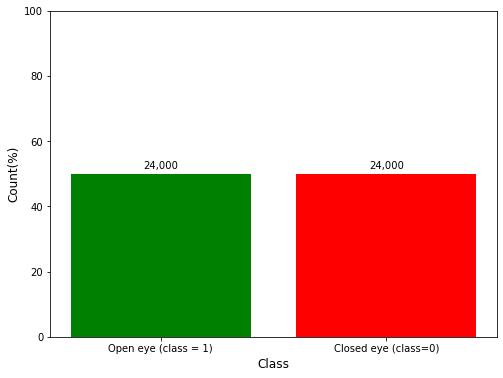

In [3]:
open_eye_count = len(next(os.walk(os.path.join(INPUT_DIR, "open_eye")))[2])
closed_eye_count = len(next(os.walk(os.path.join(INPUT_DIR, "closed_eye")))[2])

open_eye_percent = open_eye_count/(open_eye_count + closed_eye_count) * 100
closed_eye_percent = closed_eye_count/(open_eye_count + closed_eye_count) * 100

plt.figure(figsize=(8, 6))
rect1 = plt.bar(["Open eye (class = 1)"], [open_eye_percent], color="green")
plt.bar_label(rect1, [f"{open_eye_count:,d}"], padding=3)
rect2 = plt.bar(["Closed eye (class=0)"], [closed_eye_percent], color="red")
plt.bar_label(rect2, [f"{closed_eye_count:,d}"], padding=3)

plt.ylim(0, 100)
plt.ylabel("Count(%)", {"fontsize": 12})
plt.xlabel("Class", {"fontsize": 12})
plt.show()

🔑 The classes in the dataset are **balanced**. Each class is represented by $24,000$ images.

# Split training,validation, and test data
We're going to allocate $20\%$ of the original dataset as the *test set*.
The remaining $80\%$ will be divided as the *training set* ($70\%$) and the *validation set* ($30\%$).

**Summary**
* Total number of images: $48,000$
* Test set $(20\%)$ - $9,600$ images
* Training set $(56\%)$ - $26,880$ images
* Validation set $(24\%)$ - $11,520$ images

In [4]:
def split_dataset(parent_dir, target_dir):
    full_dir_path = os.path.join(parent_dir, target_dir)
    files = [filename for filename in os.listdir(full_dir_path)]
    files.sort()
    test_idx_limit, train_idx_limit = int(0.2 * len(files)), int((0.20 + 0.56) * len(files))
    np.random.seed(42)
    np.random.shuffle(files)
    
    test_files = files[:test_idx_limit]
    train_files = files[test_idx_limit: train_idx_limit]
    valid_files = files[train_idx_limit:]
    
    def move_files(src_dir, target_dir, files):
        for file in files:
            src_file = os.path.join(src_dir, file)
            dest_file = os.path.join(target_dir, file)
            shutil.copy(src_file, dest_file)
   

    TEST_DIR = os.path.join(OUTPUT_DIR, "test")
    if not os.path.exists(TEST_DIR):
        os.mkdir(TEST_DIR)
    TEST_TARGET_DIR = os.path.join(TEST_DIR, target_dir)
    if not os.path.exists(TEST_TARGET_DIR):
        os.mkdir(TEST_TARGET_DIR)
    move_files(full_dir_path, TEST_TARGET_DIR, test_files)
        
    TRAIN_DIR = os.path.join(OUTPUT_DIR, "train")
    if not os.path.exists(TRAIN_DIR):
        os.mkdir(TRAIN_DIR)
    TRAIN_TARGET_DIR = os.path.join(TRAIN_DIR, target_dir)
    if not os.path.exists(TRAIN_TARGET_DIR):
        os.mkdir(TRAIN_TARGET_DIR)
    move_files(full_dir_path, TRAIN_TARGET_DIR, train_files)
        
    VALID_DIR = os.path.join(OUTPUT_DIR, "valid")
    if not os.path.exists(VALID_DIR):
        os.mkdir(VALID_DIR)
    VALID_TARGET_DIR = os.path.join(VALID_DIR, target_dir)
    if not os.path.exists(VALID_TARGET_DIR):
        os.mkdir(VALID_TARGET_DIR)
    move_files(full_dir_path, VALID_TARGET_DIR, valid_files)
        
    return (TRAIN_TARGET_DIR, VALID_TARGET_DIR, TEST_TARGET_DIR)

split_dataset(INPUT_DIR, "open_eye")
split_dataset(INPUT_DIR, "closed_eye")

('/kaggle/working/train/closed_eye',
 '/kaggle/working/valid/closed_eye',
 '/kaggle/working/test/closed_eye')

In [5]:
# !ls /kaggle/working/test/open_eye | wc -l
# !ls /kaggle/working/train/open_eye | wc -l
# !ls /kaggle/working/valid/open_eye | wc -l

# !ls /kaggle/working/test/closed_eye | wc -l
# !ls /kaggle/working/train/closed_eye | wc -l
# !ls /kaggle/working/valid/closed_eye | wc -l

!tree -d /kaggle/working

/kaggle/working
├── test
│   ├── closed_eye
│   └── open_eye
├── train
│   ├── closed_eye
│   └── open_eye
└── valid
    ├── closed_eye
    └── open_eye

9 directories


In [6]:
! rm -Rf /kaggle/working/test
! rm -Rf /kaggle/working/target
! rm -Rf /kaggle/working/valid